In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import sph_harm
from scipy.io import loadmat
import seaborn as sns

def cartesian2spherical(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z/r)
    phi = np.arctan2(y, x)
    return r, theta, phi

def spherical2cartesian(r, theta, phi):
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return x, y, z

def spherical_harmonic(pos, ord, deg):
    x,y,z = pos[0], pos[1], pos[2]
    r, theta, phi = cartesian2spherical(x, y, z)
    return sph_harm(ord, deg, phi, theta)*(r**deg)

In [5]:
data_coil_trace = loadmat('data_coil_trace.mat')
coil_trace = [np.asarray(data_coil_trace['data_coil_trace'][i][0]) for i in range(29)]
norm_active_shim_result = loadmat('L2_particleswarm_results.mat')
L1_active_shim_result = loadmat('L1_particleswarm_results.mat')
std_active_shim_result = loadmat('std_particleswarm_results.mat')
X,Y,Z = loadmat("B0_map_valid.mat")['X'], loadmat("B0_map_valid.mat")['Y'], loadmat("B0_map_valid.mat")['Z']
pos = np.vstack([X,Y,Z])
print(pos.shape)

B0_no_shim = norm_active_shim_result['B0_no_shim']
B0_system_shim = std_active_shim_result['B0_shim']
B0_active_shim_L2 = norm_active_shim_result['B0_active_shim']
B0_active_shim_L1 = L1_active_shim_result['B0_active_shim']
B0_active_shim_std = std_active_shim_result['B0_active_shim']

(3, 620785)


In [6]:
R00 = spherical_harmonic(pos, 0, 0)
R_11 = spherical_harmonic(pos, -1, 1)
R01 = spherical_harmonic(pos, 0, 1)
R11 = spherical_harmonic(pos, 1, 1)
R_22 = spherical_harmonic(pos, -2, 2)
R_12 = spherical_harmonic(pos, -1, 2)
R02 = spherical_harmonic(pos, 0, 2)
R12 = spherical_harmonic(pos, 1, 2)
R22 = spherical_harmonic(pos, 2, 2)
R_33 = spherical_harmonic(pos, -3, 3)
R_23 = spherical_harmonic(pos, -2, 3)
R_13 = spherical_harmonic(pos, -1, 3)
R03 = spherical_harmonic(pos, 0, 3)
R13 = spherical_harmonic(pos, 1, 3)
R23 = spherical_harmonic(pos, 2, 3)
R33 = spherical_harmonic(pos, 3, 3)

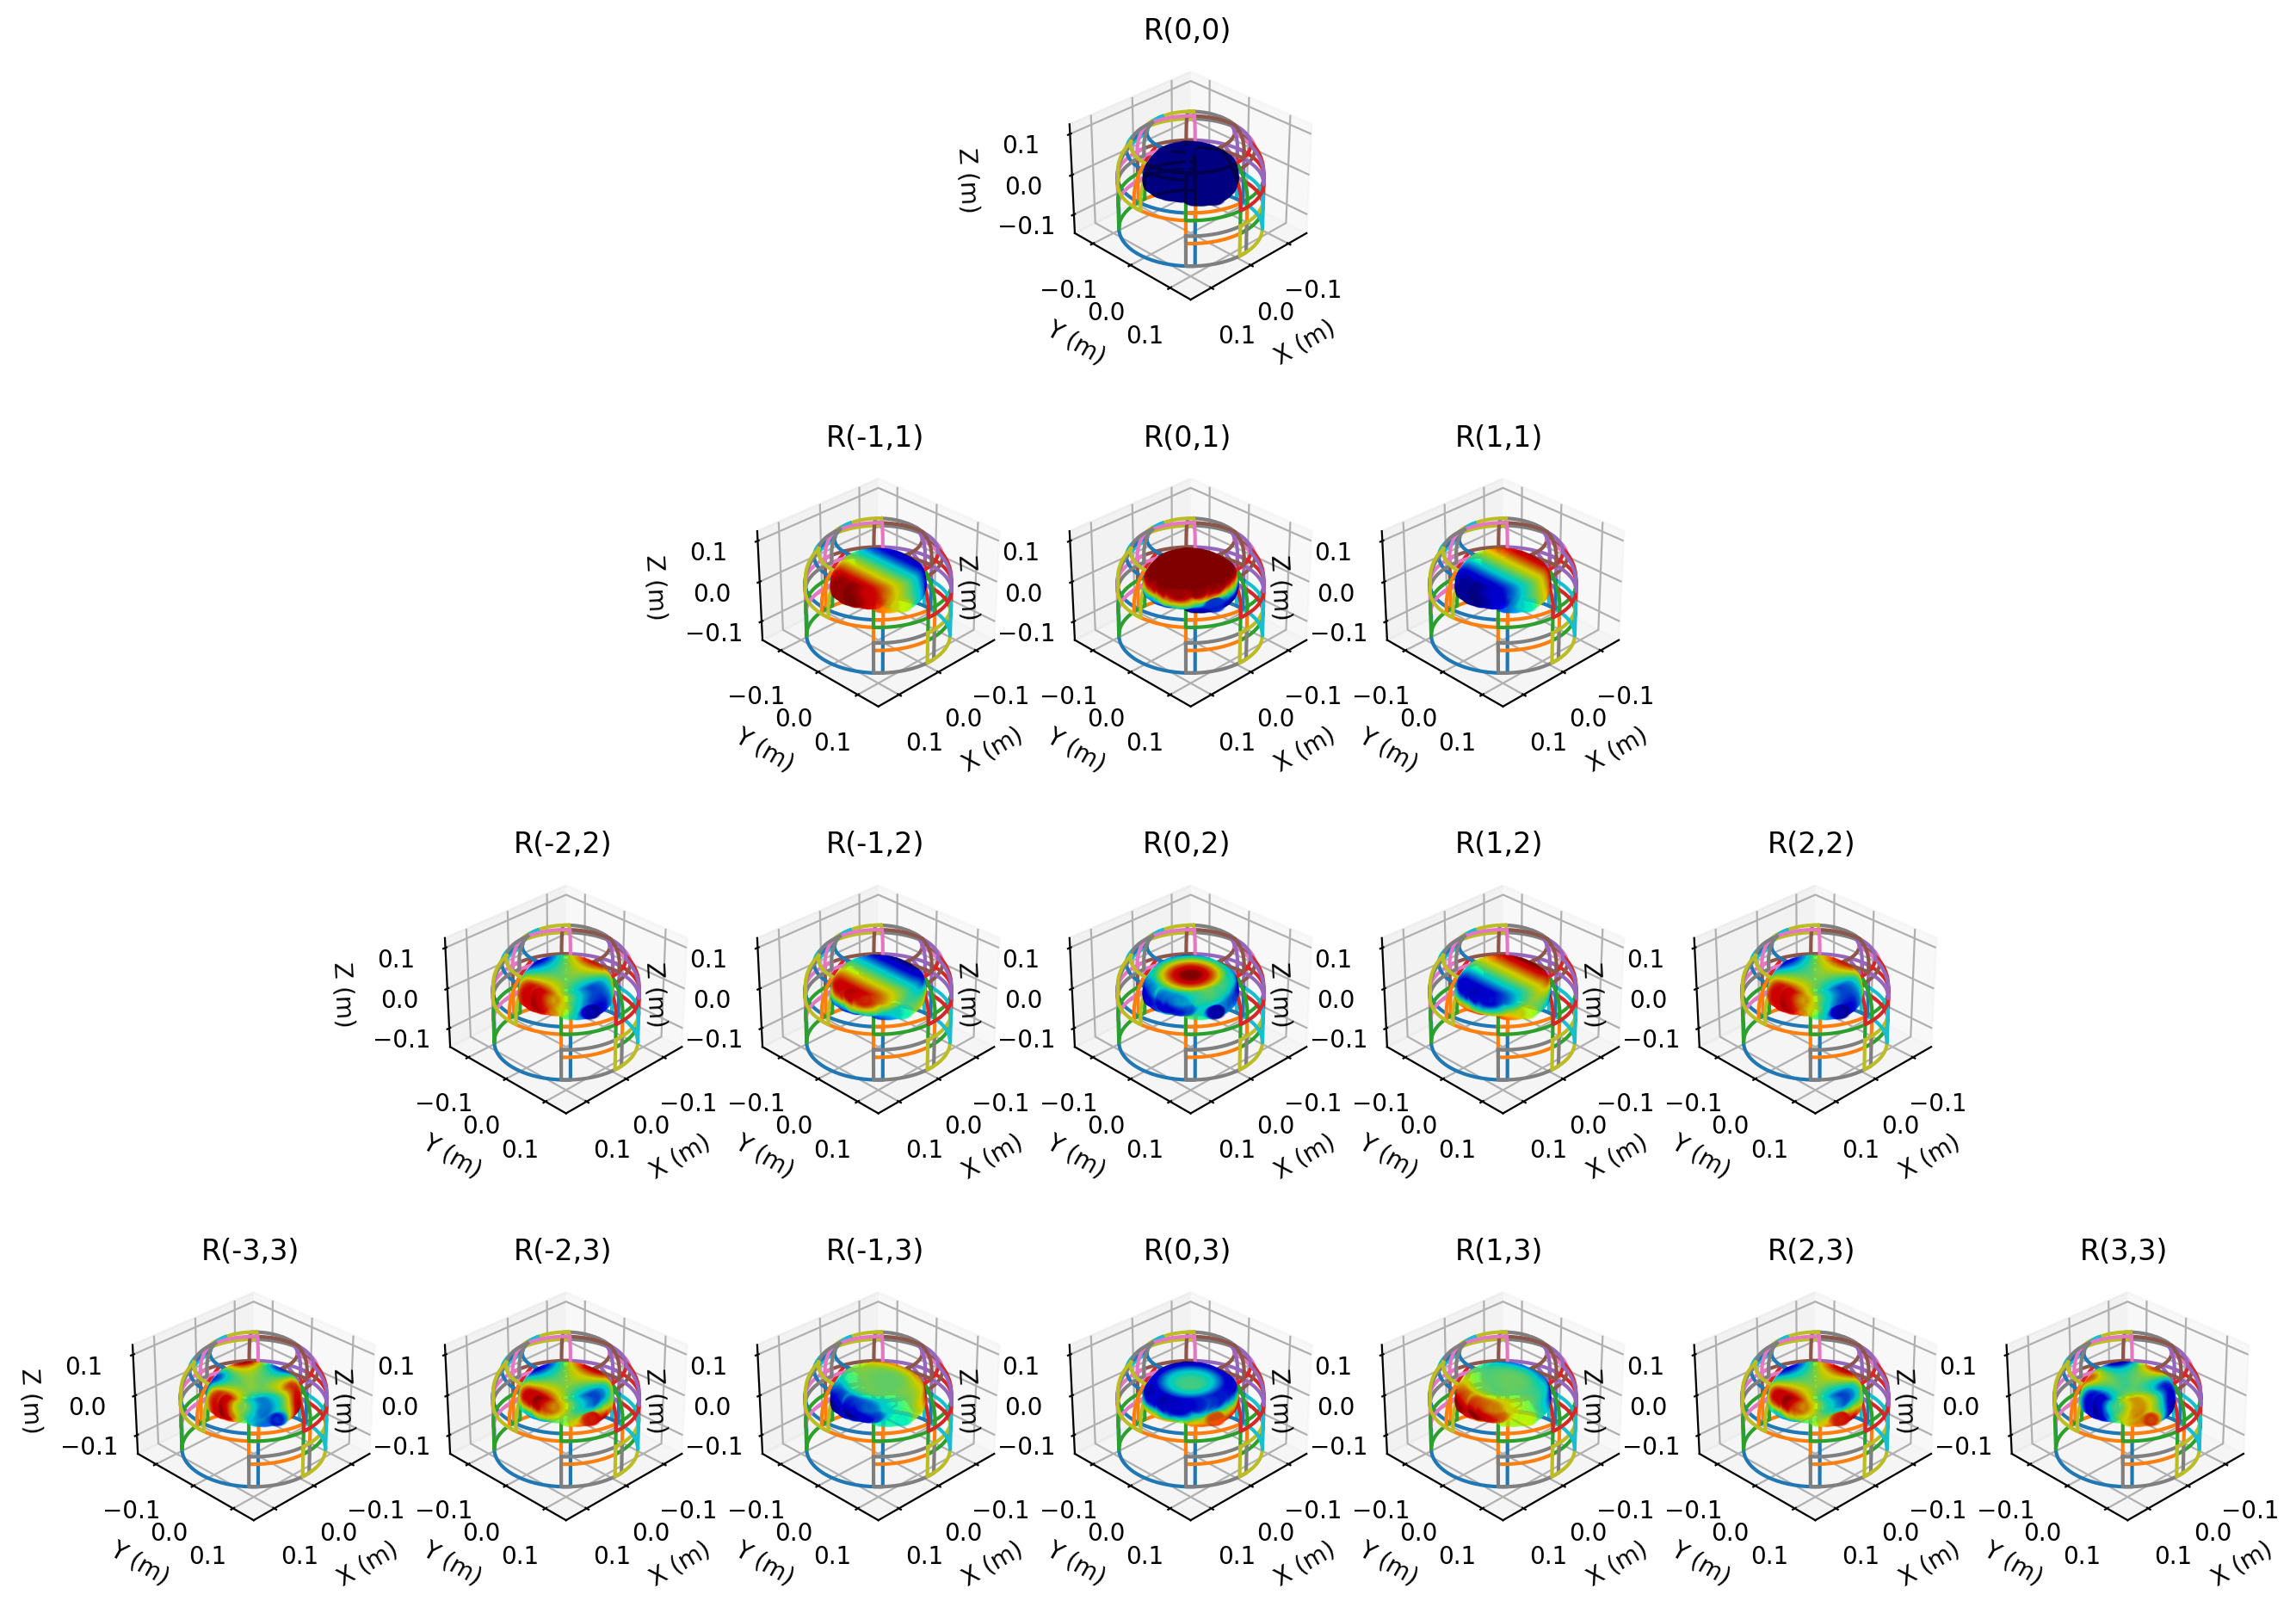

In [8]:
fig = plt.figure(dpi=200,figsize=(16,12))

ax = fig.add_subplot(4,7,4,projection='3d')
ax.scatter(pos[0], pos[1], pos[2], alpha=0.02, c=np.real(R00), cmap='jet')
for tr in coil_trace:
    ax.plot3D(tr[0], tr[1], tr[2])
ax.view_init(elev=30, azim=45)
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('R(0,0)')

ax = fig.add_subplot(4,7,10,projection='3d')
ax.scatter(pos[0], pos[1], pos[2], alpha=0.02, c=np.real(R_11), cmap='jet')
for tr in coil_trace:
    ax.plot3D(tr[0], tr[1], tr[2])
ax.view_init(elev=30, azim=45)
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('R(-1,1)')

ax = fig.add_subplot(4,7,11,projection='3d')
ax.scatter(pos[0], pos[1], pos[2], alpha=0.02, c=np.real(R01), cmap='jet')
for tr in coil_trace:
    ax.plot3D(tr[0], tr[1], tr[2])
ax.view_init(elev=30, azim=45)
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('R(0,1)')

ax = fig.add_subplot(4,7,12,projection='3d')
ax.scatter(pos[0], pos[1], pos[2], alpha=0.02, c=np.real(R11), cmap='jet')
for tr in coil_trace:
    ax.plot3D(tr[0], tr[1], tr[2])
ax.view_init(elev=30, azim=45)
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('R(1,1)')

ax = fig.add_subplot(4,7,16,projection='3d')
ax.scatter(pos[0], pos[1], pos[2], alpha=0.02, c=np.real(R_22), cmap='jet')
for tr in coil_trace:
    ax.plot3D(tr[0], tr[1], tr[2])
ax.view_init(elev=30, azim=45)
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('R(-2,2)')

ax = fig.add_subplot(4,7,17,projection='3d')
ax.scatter(pos[0], pos[1], pos[2], alpha=0.02, c=np.real(R_12), cmap='jet')
for tr in coil_trace:
    ax.plot3D(tr[0], tr[1], tr[2])
ax.view_init(elev=30, azim=45)
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('R(-1,2)')

ax = fig.add_subplot(4,7,18,projection='3d')
ax.scatter(pos[0], pos[1], pos[2], alpha=0.02, c=np.real(R02), cmap='jet')
for tr in coil_trace:
    ax.plot3D(tr[0], tr[1], tr[2])
ax.view_init(elev=30, azim=45)
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('R(0,2)')

ax = fig.add_subplot(4,7,19,projection='3d')
ax.scatter(pos[0], pos[1], pos[2], alpha=0.02, c=np.real(R12), cmap='jet')
for tr in coil_trace:
    ax.plot3D(tr[0], tr[1], tr[2])
ax.view_init(elev=30, azim=45)
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('R(1,2)')

ax = fig.add_subplot(4,7,20,projection='3d')
ax.scatter(pos[0], pos[1], pos[2], alpha=0.02, c=np.real(R22), cmap='jet')
for tr in coil_trace:
    ax.plot3D(tr[0], tr[1], tr[2])
ax.view_init(elev=30, azim=45)
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('R(2,2)')

ax = fig.add_subplot(4,7,22,projection='3d')
ax.scatter(pos[0], pos[1], pos[2], alpha=0.02, c=np.real(R_33), cmap='jet')
for tr in coil_trace:
    ax.plot3D(tr[0], tr[1], tr[2])
ax.view_init(elev=30, azim=45)
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('R(-3,3)')

ax = fig.add_subplot(4,7,23,projection='3d')
ax.scatter(pos[0], pos[1], pos[2], alpha=0.02, c=np.real(R_23), cmap='jet')
for tr in coil_trace:
    ax.plot3D(tr[0], tr[1], tr[2])
ax.view_init(elev=30, azim=45)
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('R(-2,3)')

ax = fig.add_subplot(4,7,24,projection='3d')
ax.scatter(pos[0], pos[1], pos[2], alpha=0.02, c=np.real(R_13), cmap='jet')
for tr in coil_trace:
    ax.plot3D(tr[0], tr[1], tr[2])
ax.view_init(elev=30, azim=45)
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('R(-1,3)')

ax = fig.add_subplot(4,7,25,projection='3d')
ax.scatter(pos[0], pos[1], pos[2], alpha=0.02, c=np.real(R03), cmap='jet')
for tr in coil_trace:
    ax.plot3D(tr[0], tr[1], tr[2])
ax.view_init(elev=30, azim=45)
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('R(0,3)')

ax = fig.add_subplot(4,7,26,projection='3d')
ax.scatter(pos[0], pos[1], pos[2], alpha=0.02, c=np.real(R13), cmap='jet')
for tr in coil_trace:
    ax.plot3D(tr[0], tr[1], tr[2])
ax.view_init(elev=30, azim=45)
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('R(1,3)')

ax = fig.add_subplot(4,7,27,projection='3d')
ax.scatter(pos[0], pos[1], pos[2], alpha=0.02, c=np.real(R23), cmap='jet')
for tr in coil_trace:
    ax.plot3D(tr[0], tr[1], tr[2])
ax.view_init(elev=30, azim=45)
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('R(2,3)')

ax = fig.add_subplot(4,7,28,projection='3d')
ax.scatter(pos[0], pos[1], pos[2], alpha=0.02, c=np.real(R33), cmap='jet')
for tr in coil_trace:
    ax.plot3D(tr[0], tr[1], tr[2])
ax.view_init(elev=30, azim=45)
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('R(3,3)')
plt.show()

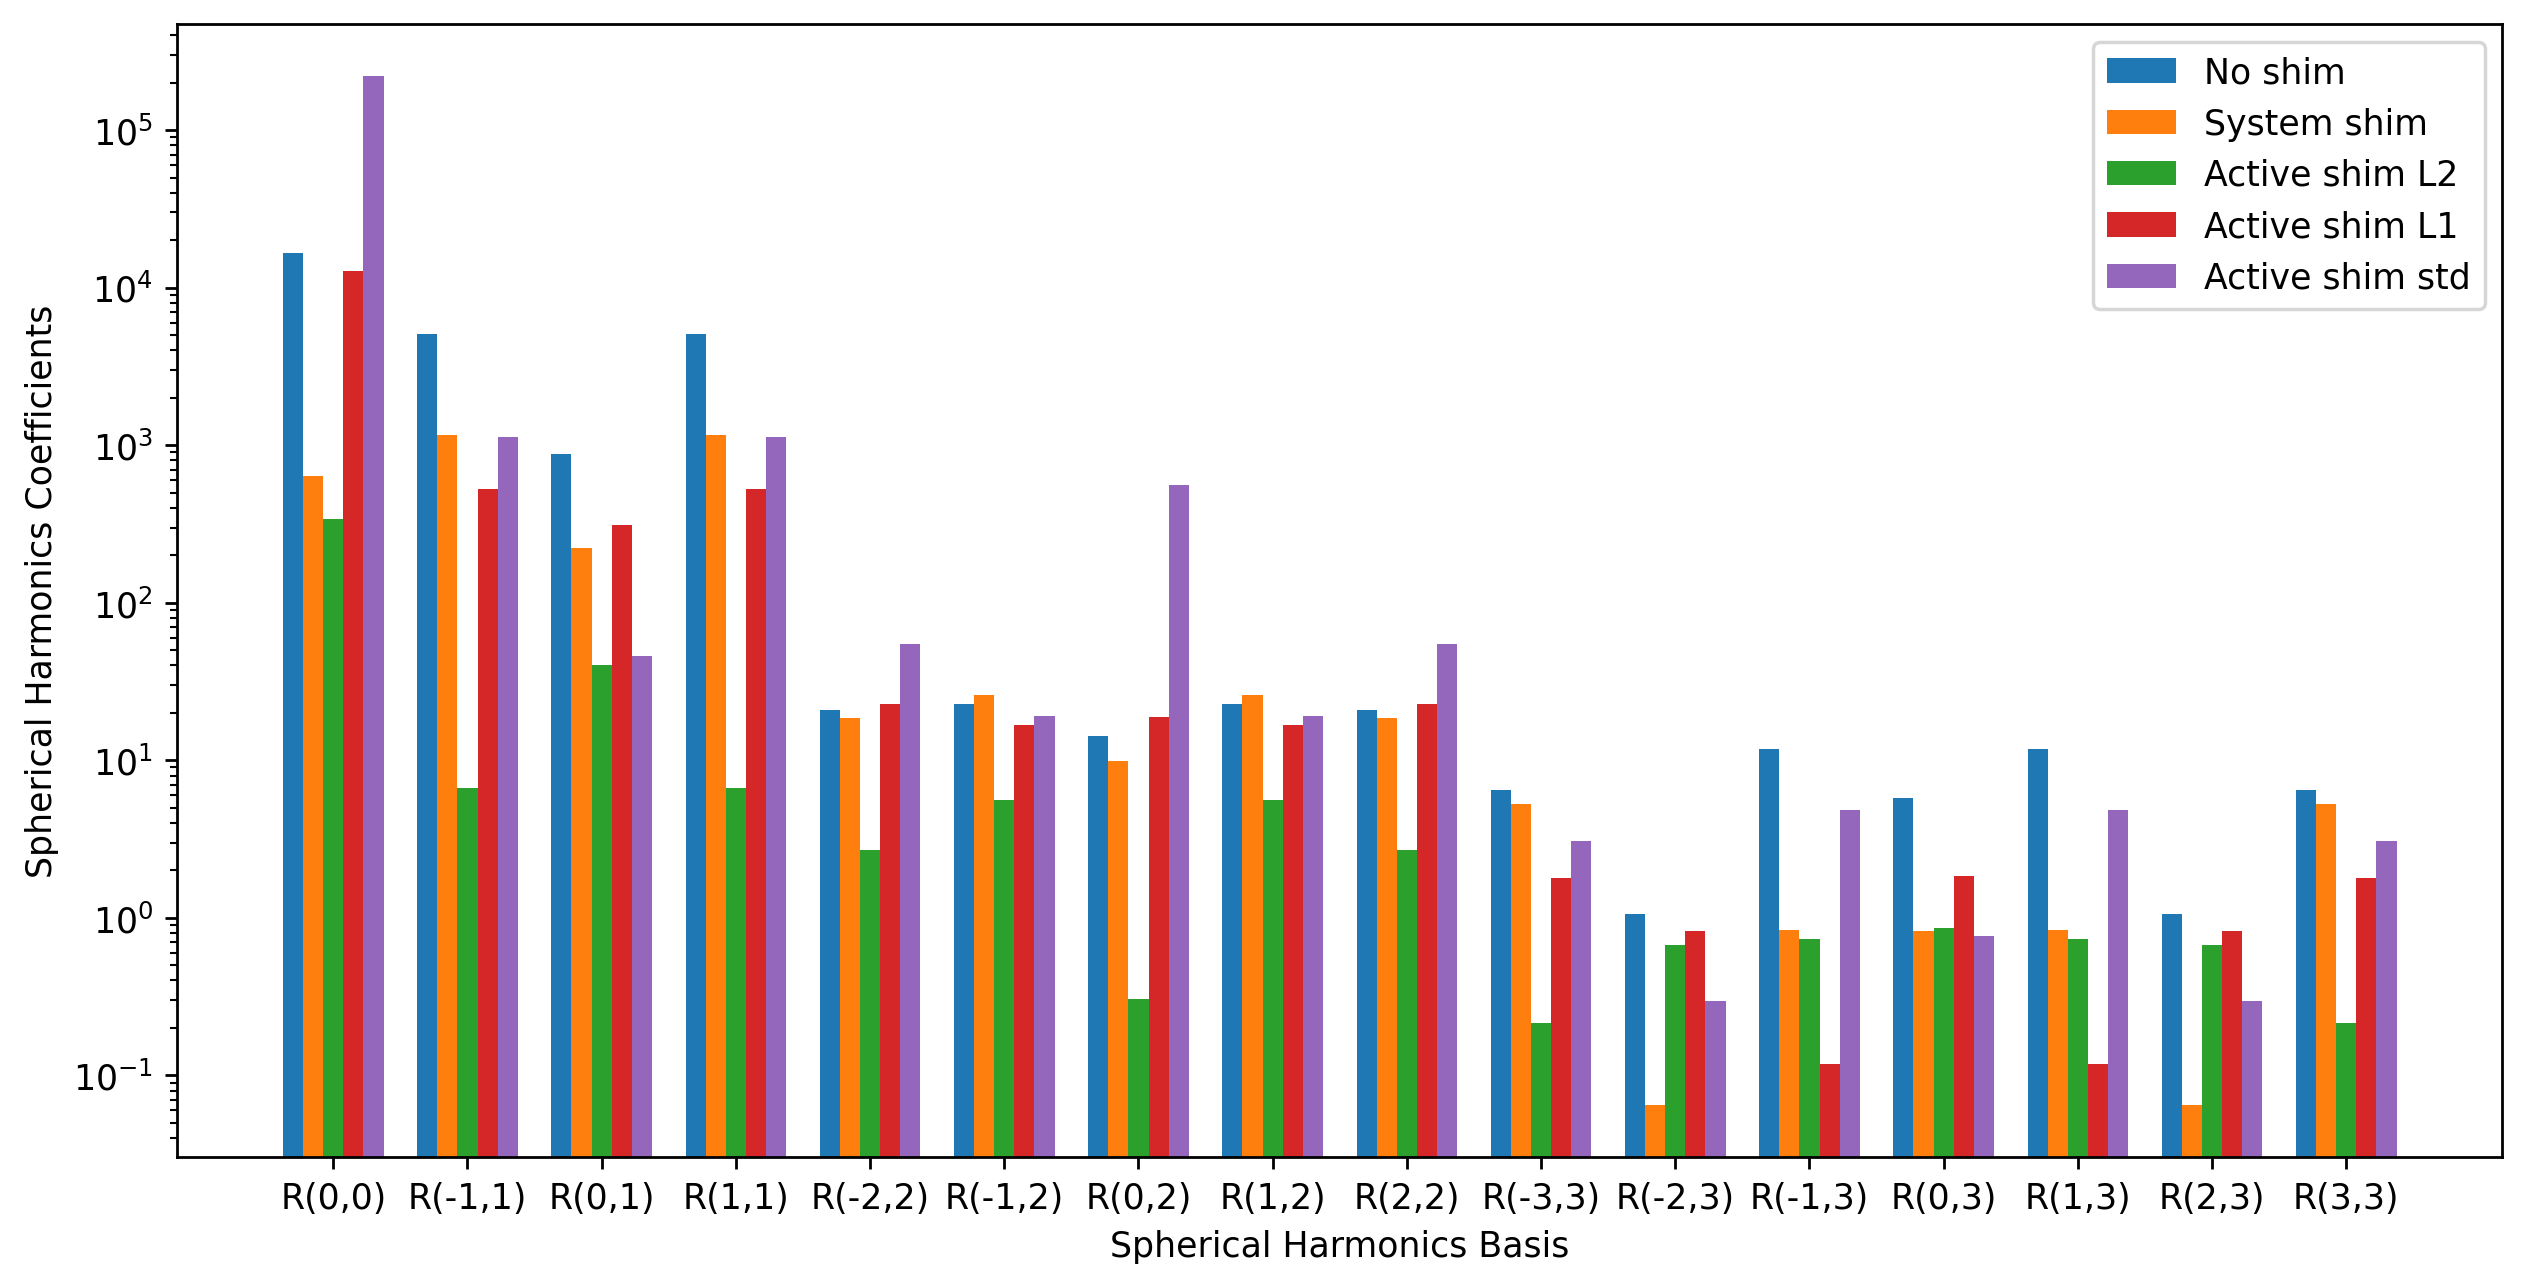

In [7]:
def coeff_Spherical_Harmonics_2nd(B0_map):
    R = np.vstack([R00, R_11, R01, R11, R_22, R_12, R02, R12, R22,R_33, R_23, R_13, R03, R13, R23, R33])
    return R@B0_map.T

coeff_no_shim = coeff_Spherical_Harmonics_2nd(B0_no_shim)
coeff_system_shim = coeff_Spherical_Harmonics_2nd(B0_system_shim)
coeff_active_shim_L2 = coeff_Spherical_Harmonics_2nd(B0_active_shim_L2)
coeff_active_shim_L1 = coeff_Spherical_Harmonics_2nd(B0_active_shim_L1)
coeff_active_shim_std = coeff_Spherical_Harmonics_2nd(B0_active_shim_std)

plt.figure(figsize=(12,6),dpi=250)
plt.bar(np.arange(16), np.abs(coeff_no_shim).flatten(), width=0.15, label='No shim')
plt.bar(np.arange(16)+0.15, np.abs(coeff_system_shim).flatten(), width=0.15, label='System shim')
plt.bar(np.arange(16)+0.3, np.abs(coeff_active_shim_L2).flatten(), width=0.15, label='Active shim L2')
plt.bar(np.arange(16)+0.45, np.abs(coeff_active_shim_L1).flatten(), width=0.15, label='Active shim L1')
plt.bar(np.arange(16)+0.6, np.abs(coeff_active_shim_std).flatten(), width=0.15, label='Active shim std')
plt.yscale('log')
plt.xticks(np.arange(16)+0.3, ['R(0,0)', 'R(-1,1)', 'R(0,1)', 'R(1,1)', 'R(-2,2)', 'R(-1,2)', 'R(0,2)', 'R(1,2)', 'R(2,2)', 'R(-3,3)', 'R(-2,3)', 'R(-1,3)', 'R(0,3)', 'R(1,3)', 'R(2,3)', 'R(3,3)'])
plt.ylabel('Spherical Harmonics Coefficients')
plt.xlabel('Spherical Harmonics Basis')
plt.legend()
plt.show()

In [8]:
def print_table(first,coeff):
    print("\n|", first, end = " | ")
    for i in range(16):
        print("{:.3f}".format(float(np.abs(coeff[i]))),end=" | ")

# print("no shim | ", np.abs(coeff_no_shim).tolist())
# print("system shim\n", np.abs(coeff_system_shim))
# print("active shim L2\n", np.abs(coeff_active_shim_L2))
# print("active shim L1\n", np.abs(coeff_active_shim_L1))
# print("active shim std\n", np.abs(coeff_active_shim_std))
print_table("No Shim",coeff_no_shim)
print_table("System Shim",coeff_system_shim)
print_table("Active Shim L2",coeff_active_shim_L2)
print_table("Active Shim L1",coeff_active_shim_L1)
print_table("Active Shim Std",coeff_active_shim_std)



| No Shim | 16579.010 | 5090.957 | 885.143 | 5090.957 | 20.755 | 22.654 | 14.172 | 22.654 | 20.755 | 6.519 | 1.057 | 11.846 | 5.758 | 11.846 | 1.057 | 6.519 | 
| System Shim | 639.954 | 1158.936 | 222.990 | 1158.936 | 18.674 | 25.885 | 9.885 | 25.885 | 18.674 | 5.263 | 0.064 | 0.835 | 0.830 | 0.835 | 0.064 | 5.263 | 
| Active Shim L2 | 340.876 | 6.653 | 40.109 | 6.653 | 2.676 | 5.582 | 0.304 | 5.582 | 2.676 | 0.215 | 0.668 | 0.738 | 0.862 | 0.738 | 0.668 | 0.215 | 
| Active Shim L1 | 12724.295 | 526.471 | 310.119 | 526.471 | 22.922 | 16.701 | 18.800 | 16.701 | 22.922 | 1.794 | 0.821 | 0.118 | 1.830 | 0.118 | 0.821 | 1.794 | 
| Active Shim Std | 221274.086 | 1135.238 | 45.682 | 1135.238 | 55.021 | 19.102 | 559.784 | 19.102 | 55.021 | 3.051 | 0.297 | 4.868 | 0.764 | 4.868 | 0.297 | 3.051 | 

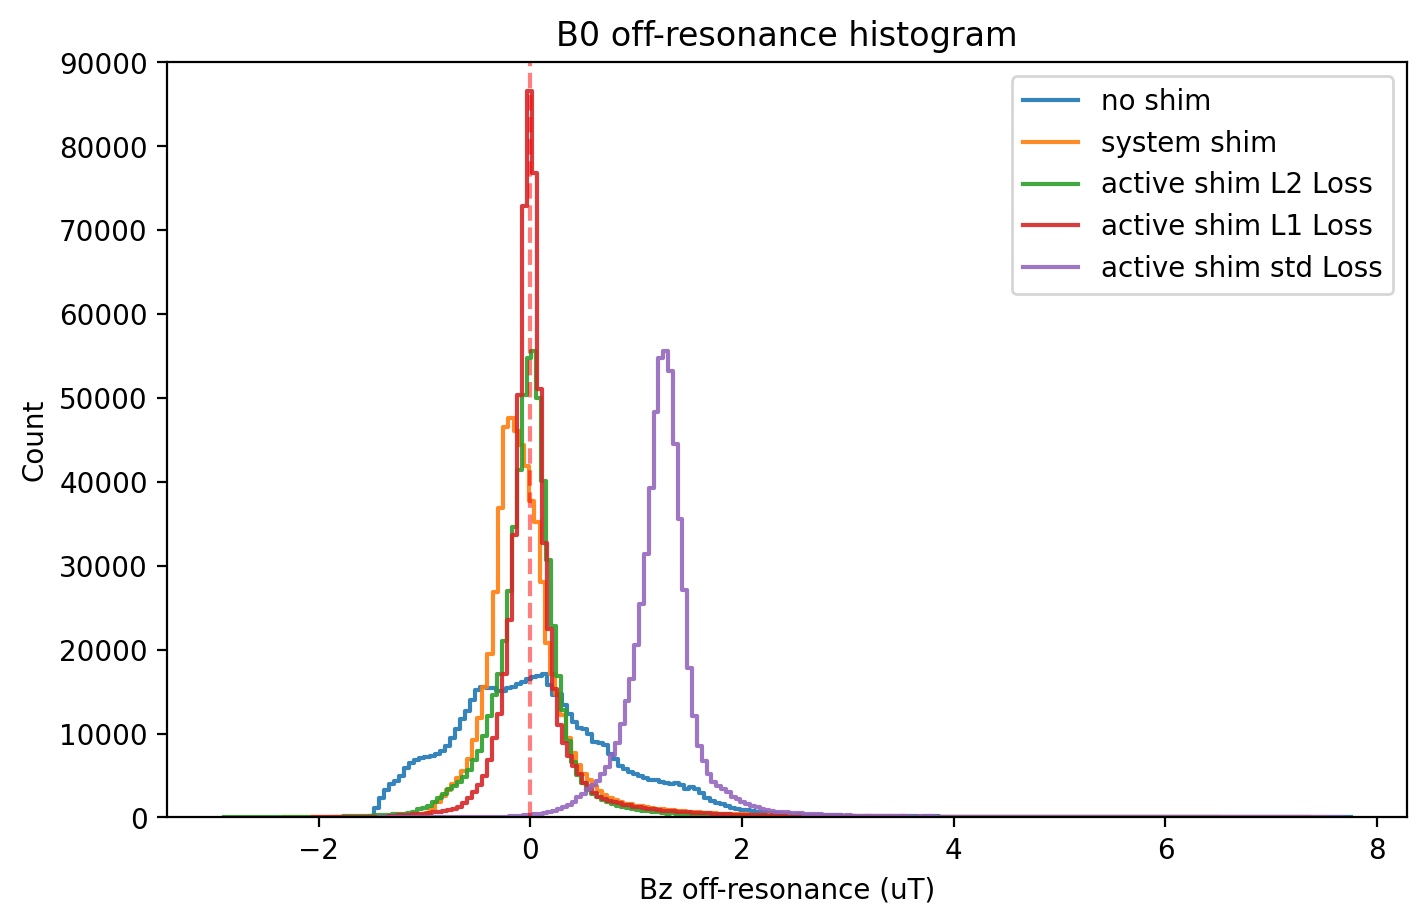

In [9]:
plt.figure(figsize=(8,5),dpi=200)
sns.histplot(B0_no_shim.flatten(), bins=200, alpha=0.9, label='no shim',element="step",fill=False)
sns.histplot(B0_system_shim.flatten(), bins=200, alpha=0.9, label='system shim',element="step",fill=False)
sns.histplot(B0_active_shim_L2.flatten(), bins=200, alpha=0.9, label='active shim L2 Loss',element="step",fill=False)
sns.histplot(B0_active_shim_L1.flatten(), bins=200, alpha=0.9, label='active shim L1 Loss',element="step",fill=False)
sns.histplot(B0_active_shim_std.flatten(), bins=200, alpha=0.9, label='active shim std Loss',element="step",fill=False)
plt.plot([0,0],[0,90000],linestyle="--",c='r',alpha=0.5)
plt.ylim(0,90000)
plt.legend()
plt.xlabel("Bz off-resonance (uT)")
plt.title("B0 off-resonance histogram")
plt.show()